# BlackJack Solver

Use data from `results.pkl` to evaluate many blackjack games to find an optimal
strategy.

In [2]:
# Import libraries
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns

Read in the data

In [3]:
df = pd.read_pickle("results_1000.pkl")
# Sample data
df

,player_id,dealer_up_card,dealer_up_card_value,dealer_final_hand_value,dealer_busted,dealer_blackjack,dealer_final_hand,player_bet,player_hand,player_hand_value,player_busted,player_blackjack,player_won,player_winnings,player_stack,player_strategy
0,1,6H,6,26,True,False,"[6H, KC, TC]",10,"[2S, 7S, 5H, 3H]",17,False,False,1,20,1010,h16
1,1,JC,10,20,False,False,"[JC, JC]",10,"[KC, 3S, 5H]",18,False,False,0,0,1000,h16
2,1,3C,3,19,False,False,"[3C, 6S, 2H, 4D, 4H]",10,"[2H, QD, AH, 6S]",19,False,False,0,0,990,h16
3,1,7C,7,21,False,False,"[7C, 5S, 9H]",10,"[KS, QC]",20,False,False,0,0,980,h16
4,1,3C,3,20,False,False,"[3C, 9D, 8D]",10,"[2D, 4S, 9S, 2S]",17,False,False,0,0,970,h16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,JD,10,19,False,False,"[JD, 9C]",10,"[6D, 3H, KD]",19,False,False,0,0,20,h16
424,1,4S,4,22,True,False,"[4S, TC, 8H]",10,"[QS, 8D]",18,False,False,1,20,30,h16
425,1,2H,2,17,False,False,"[2H, KS, 5H]",10,"[3S, JH, KH]",23,True,False,0,0,20,h16
426,1,4D,4,17,False,False,"[4D, QC, 3C]",10,"[TD, 2C, QH]",22,True,False,0,0,10,h16


In [9]:
df["player_id"].value_counts()

1    2662
Name: player_id, dtype: int64

## Wins by dealer up card

Look at win rates with a given strategy based on the dealer up card.

In [ ]:
wins_by_up_card = df[["dealer_up_card_value", "player_hand_value", "player_won", "player_busted"]]
wins_by_up_card = wins_by_up_card[wins_by_up_card["player_busted"] == False]
wins_by_up_card["player_won"] = wins_by_up_card["player_won"].astype(float)
pivoted = wins_by_up_card.pivot_table(index="player_hand_value", columns="dealer_up_card_value").player_won
# Reorder so 'A' is first
c = pivoted.columns.to_list()
new = c[1:] + c[:1]
pivoted = pivoted[new]


Pivot data to get average win per dealer up card for each player hand value.

Player wins: 1

Player looses: 0

Player draws: 0.5

In [ ]:
pivoted*100

dealer_up_card_value,2,3,4,5,6,7,8,9,10,1
player_hand_value,,,,,,,,,,
17,30.769231,31.428571,33.333333,30.769231,33.333333,30.303030,33.333333,16.666667,21.311475,11.764706
18,50.000000,55.555556,55.882353,37.037037,63.333333,61.538462,56.521739,38.709677,35.772358,11.111111
19,72.413793,41.176471,68.965517,74.193548,73.333333,72.000000,84.210526,44.736842,48.648649,27.027027
20,74.418605,64.705882,72.413793,90.625000,85.000000,66.666667,88.235294,94.117647,53.237410,58.974359
21,87.500000,95.652174,93.103448,100.000000,94.117647,100.000000,86.363636,100.000000,91.000000,70.000000


### Results heatmap

Visualise mean results as a heatmap.

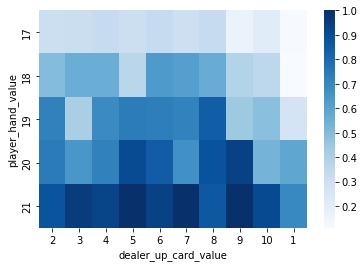

In [ ]:
sns.heatmap(pivoted, cmap='Blues')

Percentage player win

In [ ]:
perc_player_wins = df["player_won"].sum() * 100 / df["player_won"].count()
perc_player_wins

40.60856498873028

Player bust percentage

In [ ]:
perc_bust = df["player_busted"].sum() * 100 / df["player_busted"].count()
perc_bust

29.03831705484598

Player blackjack percentage

In [ ]:
perc_player_bj = df["player_blackjack"].sum() * 100 / df["player_blackjack"].count()
perc_player_bj

4.921111945905334

Number of games

In [ ]:
n_events = df["player_won"].count()
n_events

2662

## Player bust cards

For a given strategy what values were players busting on?

In [ ]:
player = df[["player_hand", "player_hand_value", "player_won", "player_busted", "player_blackjack"]]
# get the summed value of the player's hand from the first two cards
player["player_start_hand_value"] = player["player_hand"].apply(lambda x: x[0].value + x[1].value if not any(card.value == 1 for card in x[:2]) else x[0].value + 11)

player

<ipython-input-512-1d82fa8d4033>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player["player_start_hand_value"] = player["player_hand"].apply(lambda x: x[0].value + x[1].value if not any(card.value == 1 for card in x[:2]) else x[0].value + 11)


,player_hand,player_hand_value,player_won,player_busted,player_blackjack,player_start_hand_value
0,"[2S, 7S, 5H, 3H]",17,1,False,False,9
1,"[KC, 3S, 5H]",18,0,False,False,13
2,"[2H, QD, AH, 6S]",19,0,False,False,12
3,"[KS, QC]",20,0,False,False,20
4,"[2D, 4S, 9S, 2S]",17,0,False,False,6
...,...,...,...,...,...,...
423,"[6D, 3H, KD]",19,0,False,False,9
424,"[QS, 8D]",18,1,False,False,18
425,"[3S, JH, KH]",23,0,True,False,13
426,"[TD, 2C, QH]",22,0,True,False,12


<ipython-input-513-a5e22b3b1313>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bust_cards["player_busted"] = bust_cards["player_busted"].astype(int)


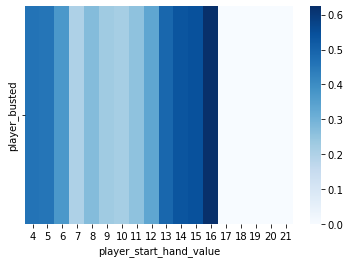

In [ ]:
bust_cards = player[["player_busted", "player_start_hand_value", "player_won"]]
# convert player_busted from bool to int
bust_cards["player_busted"] = bust_cards["player_busted"].astype(int)
b = bust_cards.pivot_table(columns="player_start_hand_value", values="player_busted")

b*100
sns.heatmap(b, cmap='Blues')

## Dealer results

Analysis on the distribution of dealer hands given an up card.

In [ ]:
dealer = df[["dealer_up_card_value", "dealer_final_hand_value", "dealer_blackjack", "dealer_busted", "player_won"]]

What percentage of times did the dealer bust where the player did not already bust?

In [ ]:
perc_dealer_busted = (dealer["dealer_busted"].sum() - df["player_busted"].sum()) * 100 / dealer["dealer_busted"].count()
perc_dealer_busted

-0.5259203606311045

In [ ]:
perc_dealer_bj = dealer["dealer_blackjack"].sum() * 100 / dealer["dealer_blackjack"].count()
perc_dealer_bj

4.1697971450037565

## Dealer bust cards

Find the distribution of dealer busts given any up card.

In [ ]:
bust_cards = df[["dealer_busted", "dealer_up_card_value"]]
# convert dealer_busted from bool to int
bust_cards["dealer_busted"] = bust_cards["dealer_busted"].astype(int)
b = bust_cards.pivot_table(columns="dealer_up_card_value", values="dealer_busted")

# Reorder so 'A' is first
c = b.columns.to_list()
new = c[1:] + c[:1]
b = b[new]
b*100

<ipython-input-517-877d126f1814>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bust_cards["dealer_busted"] = bust_cards["dealer_busted"].astype(int)


dealer_up_card_value,2,3,4,5,6,7,8,9,10,1
dealer_busted,35.323383,35.025381,44.642857,41.752577,41.666667,20.895522,25.773196,26.086957,21.922626,10.695187


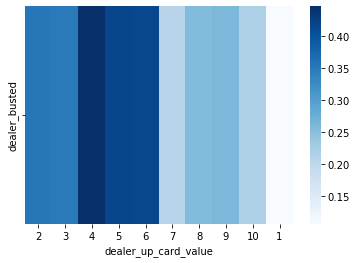

In [ ]:
sns.heatmap(b, cmap='Blues')